# Linear Reg Steps

1) Getting and initializing data

2) visualization of data

3) numpy for univariate linear reg

4) getting RMSD

5) using scikit learn to implement a multivariate reg

6) using training and validation

7) predicting prices

8) residual plots


## 1) getting and initializing data

In [1]:
#importing standard libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#importing plotting libraries

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
#boston dataset from scikit-learn
from sklearn.datasets import load_boston

In [3]:
#loading housing data
boston = load_boston()
#using built in function DESCR
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

## 2) Visualizing basic data

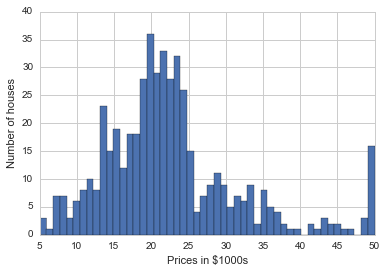

In [4]:
#histogram of prices(target of dataset)
plt.hist(boston.target,bins=50)
#label
plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')

C:\Users\seeth_000\Anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


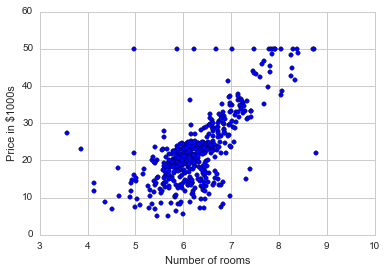

In [5]:
#checking the prices vs no.of.rooms
#plotting the column of the 5 index(labeled RM)
plt.scatter(boston.data[:,5],boston.target)
plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')
    


In [6]:
#Converting the bosotn dataset to pandas dataframe
#using seaborn to do lmplot to get linear fit

boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [7]:
boston_df['Price'] = boston.target

In [8]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


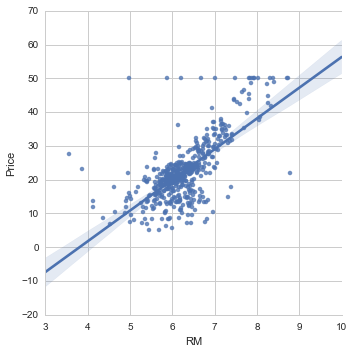

In [10]:
sns.lmplot('RM','Price',data=boston_df,legend=True)

## 3) Numpy for univariate linear reg

Numpy has Least Square Method(LSM) in its linear algebra library. Can do univariate linear reg using numpy. scikit learn can do multivariate linear reg.



In [22]:
X=boston_df.RM #X is a series/array
X[0:2]


0    6.575
1    6.421
Name: RM, dtype: float64

In [31]:
X = np.vstack(boston_df.RM) # X needs to be a 2D array for numpy
X[0:2]

array([[ 6.575],
       [ 6.421]])

In [32]:
Y= boston_df.Price #price column of boston dataframe

line has the equation:
$$y=mx+b$$
rewrite using matrices:
$$y=Ap$$
where:
$$A = \begin{bmatrix}x & 1\end{bmatrix}$$
and
$$p= \begin{bmatrix}m \\b\end{bmatrix}$$
​

In [33]:
#Creating [X 1] array
A= np.array([[value,1] for value in X])
A[0:2]

array([[array([ 6.575]), 1],
       [array([ 6.421]), 1]], dtype=object)

In [37]:
m, b =np.linalg.lstsq(A,Y)[0]
print m,b

9.10210898118 -34.6706207764


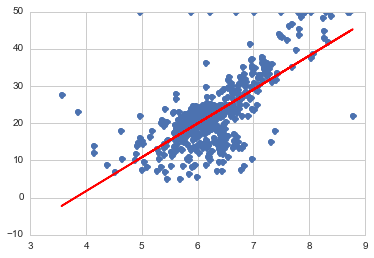

In [38]:
plt.plot(boston_df.RM,boston_df.Price,'o')
x=boston_df.RM
plt.plot(x,m*x+b,'r',label='Best Fit line')

In [41]:
#Calculating RMSD
result = np.linalg.lstsq(A,Y)
#calculating error total (square value)
error_total = result[1]
#rmsd
rmsd = np.sqrt(error_total/len(X))

rmsd

array([ 6.60307139])

In [42]:
#95% of time the housing price is $13,200(1000's) of our fit line

## 5) multivariate reg analysis using scikit learn

using sklearn to do a multivariable regression. 

sklearn.linear_model.LinearRegression class is an estimator. 

Estimators predict values based on observed data. Estimators uses fit() and predict() method. fit() used to learn the parameters of the model and predict() method used to predict the respinse variable for explanatory variable using the learned variable 

In [66]:
# import linear regression 
import sklearn
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

In [70]:
#Doing univariate linear reg like last section
X_uni = DataFrame(boston_df.RM)
Y_target=boston_df.Price

In [73]:
lreg.fit(X_uni,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [85]:
print "m is %.2f and b is %.2f" % (lreg.coef_ ,lreg.intercept_)

m is 9.10 and b is -34.67


In [86]:
#doing multivariate linear reg
X_multi=boston_df.drop('Price',1)
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [88]:
print "intercept b estimated as %.2f" %lreg.intercept_

intercept b estimated as 36.49


In [89]:
print"the number of coefficients are %d" %len(lreg.coef_)

the number of coefficients are 13


# useful [link](http://scikit-learn.org/stable/modules/linear_model.html)

In [120]:
# Set a DataFrame from the Features
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

# Set a new column lining up the coefficients from the linear regression
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

# Show
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [121]:
#Conclusion: highest correlation seems to be for number of rooms

## 6) using training and validation

scikit learn uses train_test_split  to split the data into training set and testing set

useful link [here](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)

In [131]:
#splitting data on just the room numbers and using the cross validation library 
#from sklearn
X_train,X_test,Y_train,Y_test=sklearn.cross_validation.train_test_split(A,boston_df.Price)

In [132]:
print X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

(379L, 2L) (127L, 2L) (379L,) (127L,)


## 7) Predicting prices

In [133]:
lreg=LinearRegression()

#fitting only training set
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [134]:
#predicting on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [135]:
print "Fitting a model with X_train,MSE of Y_train %.2f" %np.mean((Y_train-pred_train)**2)
print "Fitting a model with X_test,MSE of Y_test %.2f" %np.mean((Y_test-pred_test)**2)


Fitting a model with X_train,MSE of Y_train 44.22
Fitting a model with X_test,MSE of Y_test 42.16


## 8) residual plots

useful link [link](http://blog.minitab.com/blog/adventures-in-statistics/why-you-need-to-check-your-residual-plots-for-regression-analysis)

In regression analysis, the difference between the observed value of the dependent variable (y) and the predicted value (ŷ) is called the residual (e). Each data point has one residual, so that:

$$Residual = Observed\:value - Predicted\:value $$

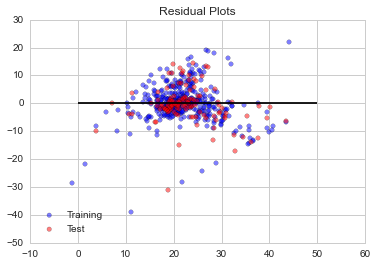

In [140]:
#scatter plot of training data
train = plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=0.5)
#scatter plot of testing data
test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)
#horizontal line at 0
plt.hlines(y=0,xmin=0,xmax=50)
#labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

#seems pretty random, good sign. 
#useful link  http://scikit-learn.org/stable/modules/linear_model.html#linear-model